In [3]:
from sklearn.datasets import make_classification, make_circles, make_moons

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [4]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)
    

In [5]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    print(X_pred.shape)
    pred = est.predict_proba(X_pred)[:, 1]
    print(pred[:30])
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    

In [24]:
def plot_surface_cust(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel(), np.square(xx1.ravel()), np.square(xx2.ravel()), np.multiply(xx1.ravel(), xx2.ravel())]
    print(X_pred.shape)
    pred = est.predict_proba(X_pred)[:, 1]
    print(pred)
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))

In [7]:
dataset = pd.read_csv('sats.csv')
X, y = dataset[['exam1', 'exam2']], dataset['submitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [8]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

In [9]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8875

In [10]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.95

(10000, 2)
[5.57550146e-06 6.38245362e-06 7.30619654e-06 8.36363317e-06
 9.57411269e-06 1.09597846e-05 1.25460038e-05 1.43617945e-05
 1.64403815e-05 1.88197973e-05 2.15435785e-05 2.46615616e-05
 2.82307950e-05 3.23165818e-05 3.69936745e-05 4.23476418e-05
 4.84764327e-05 5.54921678e-05 6.35231882e-05 7.27164014e-05
 8.32399657e-05 9.52863617e-05 1.09075909e-04 1.24860787e-04
 1.42929642e-04 1.63612848e-04 1.87288541e-04 2.14389503e-04
 2.45411057e-04 2.80920081e-04]


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


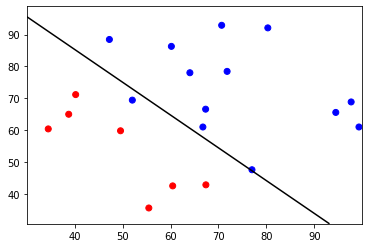

In [11]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [12]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 2) (24, 2)


In [13]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

In [14]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.4574468085106383

In [15]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.4583333333333333

(10000, 2)
[0.56582992 0.56428861 0.56274605 0.56120227 0.55965731 0.55811119
 0.55656395 0.5550156  0.55346619 0.55191574 0.55036428 0.54881184
 0.54725844 0.54570413 0.54414892 0.54259286 0.54103596 0.53947826
 0.53791979 0.53636058 0.53480065 0.53324005 0.53167879 0.53011692
 0.52855445 0.52699143 0.52542787 0.52386382 0.52229929 0.52073434]


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


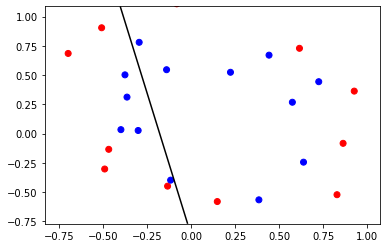

In [16]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [17]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']
X['test1test1'] = np.square(X['test1'])
X['test2test2'] = np.square(X['test2'])
X['test1test2'] = np.multiply(X['test1'], X['test2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 5) (24, 5)


In [18]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

In [19]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8085106382978723

In [20]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.7916666666666666

(10000, 5)
[0.06814869 0.07373933 0.07962274 ... 0.02107287 0.01899332 0.01708639]


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


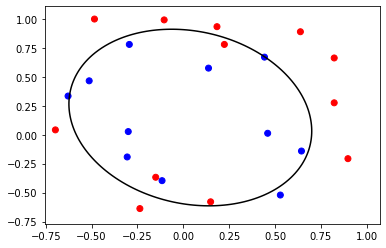

In [25]:
plot_data(X_test.values, y_test)
plot_surface_cust(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [31]:
#X, y = make_classification(n_samples=200, n_classes=2, n_features=2, n_informative=2, n_redundant=0)
#X, y = make_circles(n_samples=200)
X, y = make_moons(n_samples=1000, noise = 0.2)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
y[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int32)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(800, 2) (200, 2)


In [37]:
cls = LogisticRegression()
polynomial_features = PolynomialFeatures(degree=5,
                                             include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", cls)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linear_regression', LogisticRegression())])

In [39]:
y_train_pred = pipeline.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.9675

In [40]:
y_test_pred = pipeline.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.965

In [43]:
def plot_surface_cust(est, X, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), 
                           np.linspace(X[:,1].min(), X[:,1].max(), 100))
    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((X[:,0].min(), X[:,0].max()))
    ax.set_ylim((X[:,1].min(), X[:,1].max()))

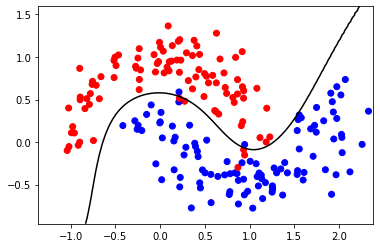

In [45]:
plot_data(X_test, y_test)
plot_surface_cust(pipeline, X_train)
plt.show()